# Step4 演習01 Pythonのクラスを使った畳み込み層とプーリング層の作成
---

本演習では、numpyを使って全結合層や畳み込み層、プーリング層といったCNNの基本的な層を実装します。

**はじめに**
- for文やwhile文の利用は明示的な利用指示がない場所での使用は避けてください。

**本演習の目的**
- numpyのみを使ってCNNの基本的な層を実装し、より理解を深める
- 全結合層、畳み込み層、プーリング層の順伝播、逆伝播を実装する

## ライブラリのインポート

まずはじめに、本演習で利用するライブラリのインポートを行います。

- [numpy](http://www.numpy.org) 数値計算を行うための基本パッケージの公式ドキュメント
- [matplotlib](http://matplotlib.org) グラフ描画ライブラリの基本パッケージの公式ドキュメント

`%matplotlib inline` はnotebook上で使える[magic function](http://ipython.readthedocs.io/en/stable/interactive/magics.html)の一つで、これによりmatplotlibをインタラクティブに使うことできます。

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## パラメータの初期化関数の実装

**【課題１】**
まずは、重みを正規分布に従って初期化する関数を作成します。`init_gaussian`には2つの引数があります。
- `shape`: 重みの形（全結合層の場合：（入力、出力）、畳み込み層の場合（フィルタの縦、フィルタの横、入力チャンネル、出力チャンネル））
- `std`： 正規分布の分散（`std=0.001`とすることで`std`のデフォルト値が`0.001`となります。

正規分布に従って初期化するには、[np.random.normal](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.random.normal.html)を使います。

In [2]:
#Coursedele-02 Step4 QuestionNumber1 404f89a87b260009e3bc22ca87280cfc
def init_gaussian(shape, std=0.001):
    ###############START CODE HERE###############
    out = np.random.normal(scale=std,size=shape)
    ################END CODE HERE################
    return out

** ファイルを保存後 **、次のセルを実行（Shift+Enter）で採点を行います。

In [3]:
%%bash
./validation_client.py dele-02 4 1 Step4_01.ipynb api.internal.zero2one.jp

Congratulations!
We give you 10 points out of 10 points.



## 全結合層の実装

**【課題２】**
ニューラルネットワークの章でも全結合層（`FC`層）は実装しましたが、ここではクラスを使って実装します。この`FC`はクラスになっており、クラスの中に3つの関数（クラス内関数=メソッド）があります。このメソッドの初めには必ず`self`があり、これを使ってクラス内の変数を取得したり、別のメソッドを呼ぶことができます。

**def \_\_init\_\_(self, in_size, out_size):**

このメソッドはクラス`FC`をはじめに呼んだ時に実行されます。
この関数には2つ（selfを除いて）の引数があります。
- `in_size`: 全結合層の入力サイズ
- `out_size`: 全結合層の出力サイズ

ここでは、全結合層の重み`W`を先ほど作成した`init_gaussian`で初期化、バイアス`b`を[np.zeros](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.zeros.html)で初期化します。ここで`self.W`や`self.b`のように`self`を使うことでこのクラス内の他のメソッドで使用することができます。

**def forward(self, X):**

このメソッドは前の層の出力`X`を入力として受け取り、順伝播を計算します。順伝播は、
$$
\begin{eqnarray}
\boldsymbol{a} = \boldsymbol{W}\boldsymbol{x} + \boldsymbol{b} (=out)
\end{eqnarray}
$$
で計算できます。この`forward`の出力は特徴マップとなります。

**def backward(self, dX):**
このメソッドは後の層の勾配`dX`を入力として受け取り、逆伝播を計算します。逆伝播は、
$$
\begin{eqnarray}
\frac{\partial\boldsymbol{L}}{\partial\boldsymbol{a}} &=&  (=dX) \\
\frac{\partial\boldsymbol{L}}{\partial\boldsymbol{W}} &=& \frac{\partial\boldsymbol{L}}{\partial\boldsymbol{a}}\frac{\partial\boldsymbol{a}}{\partial\boldsymbol{W}} (=dW) \\
\frac{\partial\boldsymbol{L}}{\partial\boldsymbol{b}} &=& \frac{\partial\boldsymbol{L}}{\partial\boldsymbol{a}}\frac{\partial\boldsymbol{a}}{\partial\boldsymbol{b}} (=db) \\
\frac{\partial\boldsymbol{L}}{\partial\boldsymbol{x}} &=& \frac{\partial\boldsymbol{L}}{\partial\boldsymbol{a}}\frac{\partial\boldsymbol{a}}{\partial\boldsymbol{x}} (=dX_{prev})
\end{eqnarray}
$$
となります。カッコ内はプログラム内の変数名です。この`backward`の出力はまず、次の層（逆伝播しているので1つ浅い層）への入力となる勾配`dX_prev`と全結合層の重みとバイアスの勾配`dW`と`db`です。

**注意**: 実装する際にはXにミニバッチの次元があるので、上式の順序を入れ替えて書く必要があります。

### FCクラスの作成

FCクラスの作成後は、下の**順伝播のテスト**と**逆伝播のテスト**で実装内容のテストができます。

もし実装に誤りがあればエラーが出力されるか、「順伝播の出力」と「逆伝播の出力」が一致しません。
<br><br>
以降の課題も<font color='red'>**"実装内容のテスト結果"**</font>を確認してエラーの解決に取り組んでみましょう。

In [4]:
#Coursedele-02 Step4 QuestionNumber2 2baf33a963d5d1fcc301090258b72af4
class FC():
    def __init__(self, in_size, out_size, lam2=0.0):
        ###############START CODE HERE###############
        '''
        Wの形は(in_size, out_size)
        bの形は（1, out_size)
        '''
        self.W = init_gaussian((in_size,out_size))
        self.b = np.zeros((1,out_size))
        ################END CODE HERE################
        self.params = [self.W, self.b]

    def forward(self, X):
        self.X = X # backwardで使うためself.Xと置く
        ###############START CODE HERE###############
        out = np.dot(self.X,self.W) + self.b
        ################END CODE HERE################
        return out

    def backward(self, dX):
        ###############START CODE HERE###############
        dW = np.dot(self.X.T, dX)
        db = np.sum(dX,axis=0)
        dX_prev = np.dot(dX, self.W.T)
        ################END CODE HERE################
        return dX_prev, [dW, db]

** ファイルを保存後 **、次のセルを実行（Shift+Enter）で採点を行います。

In [5]:
%%bash
./validation_client.py dele-02 4 2 Step4_01.ipynb api.internal.zero2one.jp

Congratulations!
We give you 10 points out of 10 points.



### 順伝播のテスト

まず`FC`の順伝播をテストします。

実装がうまくいっていない場合はエラー結果を参考にコードを見直しましょう。

In [6]:
# in_size=3, out_size=6の全結合層を作成
fc = FC(in_size=3, out_size=6)
# ランダム生成のシード値を設定
np.random.seed(1234) 
# 本来はFC内で重みWは生成してくれるが、今回は指定の重みに上書き
fc.W = np.random.random((3, 6)) 
# ミニバッチ2，サイズ2の入力Xを作成
X = np.random.random((2, 3))
out = fc.forward(X)
print('out[0] = {}'.format(out[0]))

out[0] = [0.64141611 1.44860261 1.31908022 1.58485287 1.10217833 0.65788967]


**順伝播の出力**:

fc.forward(X)[0] = [ 0.64141611  1.44860261  1.31908022  1.58485287  1.10217833  0.65788967]


クラスを使うことで内部で値を保存してくれるので、どこからでも呼び出すことができます。例えば、バイアスの値が知りたければ、`fc.bias`とするだけです。

### 逆伝播のテスト

次に`FC`の逆伝播をテストします。

実装がうまくいっていない場合はエラー結果を参考にコードを見直しましょう。

In [7]:
np.random.seed(1234) 
# 勾配を作成
dX = np.random.random((2, 6))
# 順伝播で使用したfcを使う
dX_prev, [dW, db] = fc.backward(dX)
print('dX_prev[0] =', dX_prev[0])
print('dW[0] =', dW[0])
print('db =', db)

dX_prev[0] = [1.91476169 2.07478176 1.57322977]
dW[0] = [0.31814638 0.97425129 0.92792295 1.14599162 0.82298545 0.51897731]
db = [0.46798371 1.42398095 1.39586709 1.66129122 1.13779308 0.77358773]


**逆伝播の出力**:

dX_prev[0] = [ 1.91476169  2.07478176  1.57322977]

dW[0] = [ 0.31814638  0.97425129  0.92792295  1.14599162  0.82298545  0.51897731]

db = [ 0.46798371  1.42398095  1.39586709  1.66129122  1.13779308  0.77358773]

## 畳み込み層の実装

ここからいよいよ畳み込み層の実装に入ります。一見ややこしく、複雑に見えますが基本的にニューラルネットワークの章で学んだ知識があれば実装できます。

### 畳み込みの実装
**【課題３】**
ここでは畳み込み関数`convolute`を実装します。畳み込みでは下図のように、入力のある領域にカーネルを要素毎に掛けて、すべての要素を足し合わせます。バイアスがある場合は、要素積のあとにバイアスを足し、その後すべての要素を足し合わせます。

<div style="width:60%">
<img src="./img/step4_convolute.png"></div>

もう少し厳密に説明すると、ここでは縦横以外にチャンネルがあるので、チャンネルを加えるとこのような図になります。

<div style="width:50%">
<img src="./img/step4_convolute2.png" height="200"></div>

この関数は3つの引数があります。
- `x`: 入力画像のある領域（カーネルのサイズと同じ, 下図で説明すると入力画像の黄色の四角の領域）、形は（フィルター縦幅、フィルター横幅、入力チャンネル）
- `W`: 畳み込みの重み
- `b`: 畳み込みのバイアス


In [8]:
#Coursedele-02 Step4 QuestionNumber3 04c7b3e5b29cb899cc045cc427ea6bde
def convolute(x, W, b):
    ###############START CODE HERE###############
    #行列の要素同士の掛け算
    a = np.multiply(x,W) + b
    out = np.sum(a)
    ################END CODE HERE################
    return out

** ファイルを保存後 **、次のセルを実行（Shift+Enter）で採点を行います。

In [9]:
%%bash
./validation_client.py dele-02 4 3 Step4_01.ipynb api.internal.zero2one.jp

Congratulations!
We give you 10 points out of 10 points.



`convolute`の確認をします。

In [10]:
np.random.seed(1234)
x = np.random.randn(3, 3, 2)
W = np.random.randn(3, 3, 2)
b = np.random.randn(1, 1, 1)
out = convolute(x, W, b)
print("out =", out)

out = 10.2394715745617


**畳み込みの出力**:

out = 10.2394715746

### ゼロパディングの実装

**【課題４】**
ゼロパディングは入力の側面にゼロを追加します。通常畳み込みをすると出力は入力よりも小さくなってしまいますが、ゼロパディングを導入することで、出力サイズを入力サイズと同じにすることができます。
この`zero_padding`には2つ引数があります。
- `X`: 入力テンソル（ミニバッチ、縦、横、チャンネル）
- `p`:　ゼロパディングの数

ゼロパディングをするには[np.pad](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.pad.html)を用います。この関数の2つ目の引数に`pad_width`というものであり、ここで次元毎にパディングする数をタプルで指定します。今回は`X`の縦横のみにパディングするので、pad_widthに渡す入力テンソル「（ミニバッチ、縦、横、チャンネル）」のミニバッチとチャンネルの部分に渡すタプルは(0,0)になります。

In [11]:
#Coursedele-02 Step4 QuestionNumber4 61a7f5a398a4871119ab93a07cecd8d9
def zero_padding(X, p):
    ###############START CODE HERE###############
    out = np.pad(X,[(0,0),(p,p),(p,p),(0,0)],'constant')
    ################END CODE HERE################
    return out

** ファイルを保存後 **、次のセルを実行（Shift+Enter）で採点を行います。

In [12]:
%%bash
./validation_client.py dele-02 4 4 Step4_01.ipynb api.internal.zero2one.jp

ExcessiveAccess: Wait for 10 minutes



`zero_padding`をテストします。ここでは、出力の平均を正解と比較して確認します。また、ゼロパディング前と後の画像を比較して正しくパディングできているか確認してください。

out.mean() =  0.007951681976444447


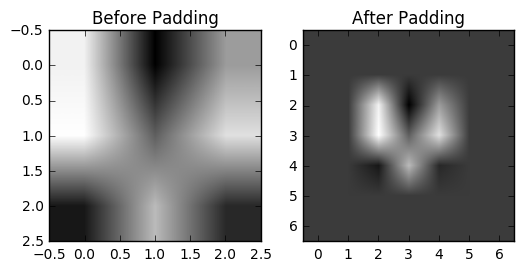

In [13]:
np.random.seed(1)
x = np.random.randn(4, 3, 3, 2)
out = zero_padding(x, 2)
print ("out.mean() = ", out.mean())
plt.subplot(1,2,1)
plt.imshow(x[0,:,:,0], cmap='gray')
plt.title('Before Padding')
plt.subplot(1,2,2)
plt.imshow(out[0,:,:,0], cmap='gray')
plt.title('After Padding')

**ゼロパディングの出力**:

out.mean() =  0.00795168197644

### Convクラスの実装

**【課題５】**
次に`class Conv()`を実装していきます。このクラスは全結合層同様に3つのメソッド（\_\_init\_\_, forward, backward)があります。これらを順に説明します。

**def \_\_init\_\_(self, X_dim, n_filter, h_filter, w_filter, stride, padding):**
このメソッドはクラス`Conv`をはじめに呼んだ時に実行されます。
この関数には6つの引数があります。
- `X_dim`: 入力テンソルの形（ミニバッチ、縦、横、チャンネル）
- `n_filter`: フィルターの数（出力チャンネルの数）
- `h_filter`: フィルターの縦幅
- `w_filter`: フィルターの横幅
- `stride`:　ストライド
- `padding`: パディングの数

このメソッド内ではまず重み`W`を`init_gaussian`で初期化、バイアス`b`を[np.zeros](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.zeros.html)で初期化します。次に畳み込み後の出力サイズを計算します。式は、

$O=\lfloor \frac{I+2p-k}{s} \rfloor+1$ 

ですが、今回はコードを簡単にするために、床関数は使わずに床関数内が整数になる場合のみを考えます。

**def forward(self, X):**

このメソッドは前の層の出力`X`を入力として受け取り、順伝播を計算します。ここではまず、出力`out`をゼロで初期化します。次に、入力`X`にゼロパディングを適用します。さてここから4重forループが始まります。一つ目のforループはミニバッチ数でループしています。ここでは、`X_pad`から1つ取り出します。その後、出力の縦、横、チャンネル数でループさせます。その後`x_pad`から畳み込みをする領域を下図のように取り出します。この場合は`x_slice = x_pad[1:4, 0:3, :]`となります。そして取り出した領域とそのチャンネルに対応した重み`W`とバイアス`b`を先程書いた、`convolute`に渡し、その出力をout[i, h, w, f]に入れます。

<div style="width:40%">
<img src="./img/step4_conv_slice.png"></div>

**def backward(self, dX):**
このメソッドは後の層の勾配`dX`を入力として受け取り、逆伝播を計算します。ここでは勾配`dX`を入力とし、`out`を次の層への勾配とします。まず、`dX_prev`を`forwad`の入力と同じ形で初期化した後、ゼロパディングを行います（`dX_pad`)。その後順伝播同様に4重forループさせます。ここで、畳み込み層の重みとバイアスの勾配は出力チャンネル毎に以下のように計算します。
$$
\begin{eqnarray}
\frac{\partial\boldsymbol{L}}{\partial\boldsymbol{a}} &=&  (=dX) \\
\frac{\partial\boldsymbol{L}}{\partial\boldsymbol{W_c}} &+=& \sum_{h=0}^{H_{out}} \sum_{w=0}^{W_{out}}
\frac{\partial\boldsymbol{L}}{\partial\boldsymbol{a_{hwc}}}
\frac{\partial\boldsymbol{a_{hwc}}}{\partial\boldsymbol{W_{c}}}(=dW[:, :, :, c])\\
\frac{\partial\boldsymbol{L}}{\partial\boldsymbol{b_c}} &+=& \sum_{h=0}^{H_{out}} \sum_{w=0}^{W_{out}}
\frac{\partial\boldsymbol{L}}{\partial\boldsymbol{a_{hwc}}}
\frac{\partial\boldsymbol{a_{hwc}}}{\partial\boldsymbol{b_{c}}}=
\frac{\partial\boldsymbol{L}}{\partial\boldsymbol{a_{hwc}}}
(=db[:, :, :, c])\\
\end{eqnarray}
$$
ここで、$H_out$と$W_out$は順伝播時の出力サイズの縦と横です。またプログラム内では、$\frac{\partial\boldsymbol{a_{hwc}}}{\partial\boldsymbol{W_{c}}}$を`x_pad_slice`としています。

次の層への勾配`dX_prev`は以下のように計算します。
\begin{eqnarray}
\frac{\partial\boldsymbol{L}}{\partial\boldsymbol{x}} &+=& \sum_{h=0}^{H_{out}} \sum_{w=0}^{W_{out}}
\frac{\partial\boldsymbol{L}}{\partial\boldsymbol{a_{hwc}}}
\frac{\partial\boldsymbol{a_{hwc}}}{\partial\boldsymbol{x}}
=\frac{\partial\boldsymbol{L}}{\partial\boldsymbol{a_{hwc}}}\boldsymbol{W_c}
(=dx\_prev\_pad[h_{start}:h_{end}, w_{start}:w_{end}, :])
\end{eqnarray}

最後に、ゼロパディングする前の状態に戻し、出力`dX_prev`が得られます。

In [14]:
#Coursedele-02 Step4 QuestionNumber5 cdf67a38235293d1cf4feb708dd9b7b2
class Conv():
    def __init__(self, X_dim, n_filter, h_filter, w_filter, stride, padding):

        h_X, w_X, self.c_X = X_dim

        self.n_filter, self.h_filter, self.w_filter = n_filter, h_filter, w_filter
        self.stride, self.padding = stride, padding
        
        ###############START CODE HERE###############
        '''
        Wの形は(フィルターの縦幅, フィルターの横幅, 入力チャンネル, 出力チャンネル)
        bの形は（1, 1, 1, 出力チャンネル)
        '''
        self.W = init_gaussian((self.h_filter,self.w_filter,self.c_X,n_filter))
        self.b = np.zeros((1,1,1,n_filter))
        ################END CODE HERE################
        self.params = [self.W, self.b]

        ###############START CODE HERE###############
        #畳み込み後の出力サイズ
        self.h_out = ((h_X + 2 * self.padding - self.h_filter) / self.stride) + 1 
        self.w_out = ((w_X + 2 * self.padding - self.w_filter) / self.stride) + 1
        ################END CODE HERE################
        
        # self.h_outあるいはself.w_outが整数出ない場合はエラーを出力
        if not self.h_out.is_integer() or not self.w_out.is_integer():
            raise Exception("Invalid dimensions!")
        # float型からint型へ変換
        self.h_out, self.w_out = int(self.h_out), int(self.w_out)
        
        # ミニバッチ次元を無視した出力サイズ、これは次の層のX_dimになる
        self.out_dim = (self.h_out, self.w_out, self.n_filter)

    def forward(self, X):

        b_X,  h_X, w_X, c_X  = self.X_shape= X.shape #batch, height, width, channel

        h_out = self.h_out
        w_out = self.w_out
        
        #　出力outをゼロで初期化
        out = np.zeros((b_X, h_out, w_out, self.n_filter))
        
        # ゼロパディングを適用
        self.X_pad =  zero_padding(X, self.padding)
        
        for i in range(b_X): # ミニバッチ数ループ
            # X_padからバッチを1つ取り出す
            x_pad = self.X_pad[i]
            for h in range(h_out): # 出力の縦方向にループ
                for w in range(w_out): # 出力の横方向にループ
                    for f in range(self.n_filter): # 出力のチャンネル数でループ
                        ###############START CODE HERE###############
                        h_start = self.stride * h
                        h_end  = h_start + self.h_filter
                        w_start = self.stride * w
                        w_end = w_start + self.w_filter
                        
                        # Xをスライス
                        x_slice =  x_pad[h_start:h_end, w_start:w_end, :]
                        
                        # 畳み込みを計算
                        out[i, h, w, f] = convolute(x_slice,self.W[:,:,:,f],self.b[:,:,:,f])
                        ################END CODE HERE################
                        
        return out

    def backward(self, dX):
        
        b_out, h_out, w_out, c_out = dX.shape
        
        # dX_prev, dW, dbをそれぞれ初期化
        dX_prev = np.zeros(self.X_shape)
        dW = np.zeros((self.h_filter, self.w_filter, self.c_X, self.n_filter))
        db = np.zeros((1, 1, 1, self.n_filter))

        # ゼロパディングを適用
        dX_prev_pad = zero_padding(dX_prev, self.padding)
        
        for i in range(b_out):
            dx_prev_pad = dX_prev_pad[i]
            x_pad = self.X_pad[i]
            for h in range(h_out):
                for w in range(w_out):
                    for c in range(c_out):
                        ###############START CODE HERE###############
                        h_start = h * self.stride
                        h_end  = h_start + self.h_filter
                        w_start = w * self.stride
                        w_end = w_start + self.w_filter
                        
                        x_pad_slice = x_pad[h_start:h_end, w_start:w_end, :]
                        
                        dW[:, :, :, c] += x_pad_slice * dX[i,h,w,c]
                        db[:, :, :, c] += dX[i,h,w,c]
                        
                        dx_prev_pad[h_start:h_end, w_start:w_end, :] += self.W[:,:,:,c] * dX[i,h,w,c]
                        ################END CODE HERE################
            p = self.padding
            ###############START CODE HERE###############
            # ゼロパディングする前の状態に戻す
            dX_prev[i, :, :, :] = dx_prev_pad[p:-p,p:-p,:]
            ################END CODE HERE################
        return dX_prev, [dW, db]

** ファイルを保存後 **、次のセルを実行（Shift+Enter）で採点を行います。

In [15]:
%%bash
./validation_client.py dele-02 4 5 Step4_01.ipynb api.internal.zero2one.jp

ExcessiveAccess: Wait for 10 minutes



### 順伝播のテスト

まずは順伝播からです。ここでは出力の平均値が同じかどうか確認します。

実装がうまくいっていない場合はエラー結果を参考にコードを見直しましょう。

In [16]:
# 畳み込み層の準備
x_dim = (15, 15, 3)
n_filter = 12
h_filter = w_filter = 3
stride = 2
padding = 2
conv = Conv(x_dim, n_filter, h_filter, w_filter, stride, padding)
# FC層の時と同様重みを上書き
np.random.seed(1234)
W = np.random.randn(3, 3, 3, 12)
conv.W = W
# ミニバッチ2, 縦横15, チャンネル数3の入力Xを準備
X = np.random.randn(2, 15, 15, 3)
#　順伝播
out = conv.forward(X)
print("out.mean() =", out.mean())

out.mean() = 0.14294554317549862


**順伝播の出力**

out.mean() = 0.142945543175

### 逆伝播のテスト

In [17]:
np.random.seed(1234)
dX = np.random.random((2, 9, 9, 12))
dX_prev, [dW, db] = conv.backward(dX)
print("dX_prev.mean() =", np.mean(dX_prev))
print("dW.mean() =", np.mean(dW))
print("db.mean() =", np.mean(db))

dX_prev.mean() = 0.8525880229461538
dW.mean() = 0.9499608418775926
db.mean() = 79.82983262122056


**逆伝播の出力**

dX_prev.mean() = 0.852588022946

dW.mean() = 0.949960841878

db.mean() = 79.8298326212

## 最大プーリング層の実装

### MaxPoolクラスの実装

**【課題６】**
次に`class MaxPool()`を実装していきます。今まで同様3つのメソッド（\__init\__, forward, backward)があります。

**def \__init\__(self, X_dim, size, stride):**
このメソッドはクラス`Conv`をはじめに呼んだときに実行されます。
この関数には3つの引数があります。

- `X_dim`: 入力テンソルの形（ミニバッチ、縦、横、チャンネル）
- `size`: フィルターのサイズ
- `stride`:　ストライド

まずはプーリング後のサイズを計算します。ここでは単純化のためゼロパディングは行いません。よって出力サイズは、

$O= \frac{I-f}{s}+1$ 

となります。

**def forward(self, X):**

このメソッドは前の層の出力`X`を入力として受け取り、順伝播を計算します。まずは出力`out`をゼロで初期化し、畳み込み層同様に4重forループがあります。また同じく入力`X`から必要な領域を切り取ります。その後、その領域の最大値のみを取り出します。これには単純に`np.max`を用います。そして最後にその出力をout[i, h, w, f]に入れます。

<div style="width:50%">
<img src="./img/step4_max_pooling.png"></div>

**def backward(self, dX):**
これまで通りこのメソッドは`dX`は前の層からの勾配です。最大値プーリングの逆伝播は他とくらべてシンプルで、分かりやすいです。例えば2×2のフィルターを使用した最大値プーリングを考えます。この時順伝播では最大値プーリングにより伝播されるのは2×2，計4個の値のうち1つです。逆伝播する際は入力の勾配を最大値を取った場所へ伝播させるだけです。図で示すとこのようになります。

<div style="width:50%">
<img src="./img/step4_max_pooling_back.png"></div>

ここで、マスク作成にはnumpyのnp.maxとpythonの比較演算子`==`を組み合わせることで1行で各ことができます。
試しに以下のコードを走らせてみて下さい。np.maxと比較演算子の組み合わせることにより、行列の要素の最大値の箇所をTrue,それ以外をFalseとさせることができます。

In [18]:
x = np.array([2,3,4,5])
x == np.max(x)

array([False, False, False,  True])

In [45]:
#Coursedele-02 Step4 QuestionNumber6 c01dc732ce53965eb359b175ca31431e
class MaxPool():

    def __init__(self, X_dim, size, stride):

        h_X, w_X, c_X = X_dim

        self.params = []

        self.size = size
        self.stride = stride
        
        ###############START CODE HERE###############
        self.h_out = ((h_X - self.size)/ self.stride) + 1
        self.w_out = ((w_X - self.size)/ self.stride) + 1
        ################END CODE HERE################
        
        # self.h_outあるいはself.w_outが整数出ない場合はエラーを出力
        if not self.h_out.is_integer() or not self.w_out.is_integer():
            raise Exception("Invalid dimensions!")
        # float型からint型へ変換
        self.h_out, self.w_out = int(self.h_out), int(self.w_out)
        
        # ミニバッチ次元を無視した出力サイズ、これは次の層のX_dimになる
        self.out_dim = (self.h_out, self.w_out, c_X)

    def forward(self, X):
        self.X = X
        self.X_shape= X.shape
        b_X,  h_X, w_X, c_X  = self.X_shape

        
        h_out = self.h_out
        w_out = self.w_out
        ###############START CODE HERE###############
        # 出力チャンネル
        c_out = c_X
        ################END CODE HERE################
        
        #　出力outをゼロで初期化
        out = np.zeros((b_X, h_out, w_out, c_out))

        for i in range(b_X): # ミニバッチ数ループ
            for h in range(h_out): # 出力の縦方向にループ
                for w in range(w_out): # 出力の横方向にループ
                    for c in range(c_out): # 出力のチャンネル数でループ
                        ###############START CODE HERE###############
                        h_start = h * self.stride
                        h_end  = h_start + self.size
                        w_start = w * self.stride
                        w_end = w_start + self.size
                         
                        X_slice = X[i, h_start:h_end, w_start:w_end, c]
                        
                        # 最大値プーリング
                        out[i, h, w, c] = np.max(X_slice)
                        ################END CODE HERE################
        return out

    def backward(self, dX):
        b_out, h_out, w_out, c_out = dX.shape
        # 出力をゼロで初期化
        dX_prev = np.zeros(self.X_shape)
        
        for i in range(b_out):
            x = self.X[i]
            for h in range(h_out):
                for w in range(w_out):
                    for c in range(c_out):
                        ###############START CODE HERE###############
                        h_start = h * self.stride
                        h_end  = h_start + self.size
                        w_start = w * self.stride
                        w_end = w_start + self.size
                        x_slice = x[h_start:h_end, w_start:w_end, c]
                        # マスクの作成
                        mask = ( x_slice == np.max(x_slice))
                        # 逆伝播
                        dX_prev[i, h_start:h_end, w_start:w_end, c]+=mask* dX[i, h, w, c]
                        ################END CODE HERE################
        return dX_prev, []

** ファイルを保存後 **、次のセルを実行（Shift+Enter）で採点を行います。

In [46]:
%%bash
./validation_client.py dele-02 4 6 Step4_01.ipynb api.internal.zero2one.jp

Congratulations!
We give you 10 points out of 10 points.



### 順伝播のテスト

実装がうまくいっていない場合はエラー結果を参考にコードを見直しましょう。

In [47]:
# 最大値プーリング層の準備
X_dim = (4,4,1)
size = 2
stride = 2
pool = MaxPool(X_dim, size, stride)
# ミニバッチ1， 縦横4, チャンネル数1の入力Xの準備
np.random.seed(1234)
X = np.random.random((1, 4, 4, 1))
# 順伝播
out = pool.forward(X)
print("out[0,:,:,0] =", out[0,:,:,0])

out[0,:,:,0] = [[0.77997581 0.80187218]
 [0.95813935 0.56119619]]


**順伝播の出力**

out[0,:,:,0] = [[ 0.77997581  0.80187218]
 [ 0.95813935  0.56119619]]

In [48]:
np.random.seed(2)
dX = np.random.randn(1, 2, 2, 1)
dX_prev, _ = pool.backward(dX)
print('dX_prev[0,:,:,0] = ', dX_prev[0,:,:,0]) 

dX_prev[0,:,:,0] =  [[ 0.          0.          0.          0.        ]
 [-0.41675785  0.          0.         -0.05626683]
 [-2.1361961   0.          0.          0.        ]
 [ 0.          0.          0.          1.64027081]]


**逆伝播の出力**

dX_prev =  [[ 0.          0.          0.          0.        ]
 [-0.41675785  0.          0.         -0.05626683]
 [-2.1361961   0.          0.          0.        ]
 [ 0.          0.          0.          1.64027081]]